[Retour au sommaire](../index.ipynb)

# 8.4 Algorithmique : Recherche dichotomique

Afin de rechercher la présence (ou non) d'un élément dans une liste **triée par ordre croissant**, le premier algorithme qui vient à l'esprit est de parcourir les éléments de la liste un par un.

## 8.4.1 Algorithme naïf

### pseudo code

```
//variables d'entrée
value: Valeur cherchée (entier)
table : liste de N entiers triés

//resultat
Retourne l'indice de l'élément dans la table, -1 si la valeur n'est pas trouvée
result : Entier
			 
//initialisation
retour ← -1
i ← 0 #indice dans la liste

//Boucle de recherche
// La condition début inférieur à fin permet d'éviter de faire
// une boucle infinie si 'val' n'existe pas dans le tableau.
Tant que i < N et retour est faux:
	si table[i] == value:
		result ← i
	i ← i+1				  
return result
```

### Implémentation en Python:

In [1]:
def search_value(value, table):
    """
    value: Valeur cherchée (entier)
    table : liste de N entiers triés
    Retourne l'indice de l'élément dans la table, -1 si la valeur n'est pas trouvée
    """
    # Initialisation
    result = -1
    i = 0
    n = len(table)
    while i < n and result == -1: # on continue si l'indice n'a pas atteint la fin et que le resultat = -1
    #while not(i>n or result!=-1): # on s'arrete dès que l'indice a atteint la fin ou que le resultat est différent de -1
        if table[i] == value:
            result = i
        i+=1
    # fin de boucle
    return result

print(search_value(3, [1,2,5,6,7,8,9,10]))
print(search_value(10, [1,2,5,6,7,8,9,10]))
print(search_value(10, []))      

-1
7
-1


### Exercice

Implémenter cette fonction en utilisant une boucle *for*.

In [2]:
## implémentation avec un for
def search_value2(value, table):
    """
    value: Valeur cherchée (entier)
    table : liste de N entiers triés
    Retourne l'indice de l'élément dans la table, -1 si la valeur n'est pas trouvée
    """
    pass

print(search_value2(3, [1,2,5,6,7,8,9,10]))
print(search_value2(10, [1,2,5,6,7,8,9,10]))
print(search_value2(10, []))

None
None
None


### complexité temporelle.

Plaçons nous dans le pire des cas, c'est à dire que l'élément n'est pas dans la liste de longueur *n*.
Il faut alors effectuer *n* comparaisons.

<div class="alert alert-info">

Le coût temporel de l'algorithme séquentiel est donc **linéaire**.

On note $T(n) = \Theta(n)$.    
</div>


**Remarques**

- Cet algorithme est facilement améliorable, on peut par exemple retourner -1 si la valeur est plus petite que le premier élément du tableau ou si elle est plus grande que le dernier élément.
    
- Mais le pire des cas est "l'élément est en dernière position", revient également à faire *n* comparaisons.

### Relevé de mesures

Représentons le temps nécessaire pour la recherche d'un élément dans le pire des cas (L'élément recherché est le dernier de la liste).

Si la représentation du temps en fonction du nombre d'éléments est une droite passant par l'origine, les mesures confirmeront la théorie.

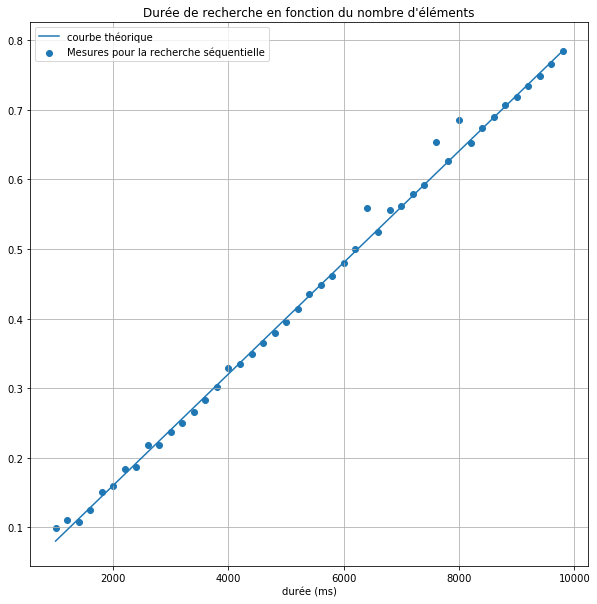

In [191]:
import random
import string
import matplotlib.pyplot as plt
from time import process_time

lettres = string.ascii_lowercase

def create_mots(N, l=3):
    """Renvoie une liste de N mots ayant l lettres triés par ordre croissant """
    L = []
    # on rend le générateur prédictible en imposant une graine fixe
    #random.seed(2022)
    for i in range(N):
        mot = ''.join(random.choice(lettres) for i in range(l))
        L.append(mot)
    L.sort() # on trie la liste
    return L

def mesure(n):
    """
    Retourne le temps moyen (en ms) pour effectuer la recherche du dernier élément dans une liste triée de n éléments
    """
    liste = create_mots(n, l=5)
    somme = 0
    for i in range(10):
        start = process_time()
        search_value(liste[-1], liste)
        end = process_time()
        somme += end-start
    return 1000*somme/10 # on effectue la moyenne des temps

results = []
for i in range(1000, 10000, 200):
    t = mesure(i)
    results.append((i, t))

plt.figure(figsize=(10, 10))
plt.xlabel("nombre d'éléments dans la liste")
plt.xlabel("durée (ms)")

x = [r[0] for r in results]
y = [r[1] for r in results]
plt.scatter(x, y, label='Mesures pour la recherche séquentielle')

x_max = x[-1]
y_max = y[-1]
coef_dir = y_max/x_max
y1=[v*coef_dir for v in x]
plt.plot(x, y1, label='courbe théorique')

plt.legend()
plt.title("Durée de recherche en fonction du nombre d'éléments")
plt.grid(True)
plt.show()

## 8.4.2 La recherche dichotomique

### Définition

La **recherche dichotomique**, ou **recherche par dichotomie** (en anglais : *binary search*), est un algorithme de recherche qui permet de trouver la position d'un élément dans un tableau trié.

Le principe est le suivant : comparer l'élément avec la valeur de la case au milieu du tableau ; si les valeurs sont égales, la tâche est accomplie, sinon on recommence dans la moitié du tableau pertinente.

[Source wikipedia](https://fr.wikipedia.org/wiki/Recherche_dichotomique)


### Explications animées

- [Vidéo explicative sur la dichotomie (10 min)](https://www.youtube.com/watch?v=ULr_8ocz0AU)

- [Animation javascript](https://professeurb.github.io/articles/dichoto/)

### Algorithme en pseudo code

**variables d'entrée**:

- value: Valeur cherchée
- table : liste triée par ordre croissant

**resultat**

Retourne l'indice de l'élément dans la table, -1 si la valeur n'est pas trouvée
result : Entier


- on initialise l'indice de gauche *i* à 0.
- on initialise l'indice de droite *j* à la position du dernier élément de la liste.
- tant que la différence entre l'indice du dernier élément et l'indice du premier élément est positive:
    - on détermine l'indice *median*.
    - si la valeur est égale à celle de l'indice médian on retourne l'indice médian (la valeur est trouvée).
    - Si la valeur est inférieure, on cherche dans la partie gauche (j devient median-1).
    - sinon dans la partie droite (i devient median + 1).
- quand la boucle est finie (non trouvé) on retourne -1.

### Variant de boucle

<div class="alert alert-info">

**Définition**

On appelle **variant de boucle** toute quantité *v* vérifiant:
- $ v \in \mathbf{N}$
- $v$ décroit strictement à chaque passage dans la boucle
    
Un variant de boucle sert à prouver la **terminaison d'une boucle**, c'est-à-dire que l’on sort nécessairement de la boucle au bout d’un nombre fini d’itérations.
</div>

### Terminaison de l'algorithme

Prenons la valeur i-j (l'indice de gauche - l'indice de droite).
Sa valeur initiale $v_0$, au début de l'algorithme vaut la *longueur de la liste -1*

Si la liste n'est pas vide, on a donc $ v_0 \in \mathbf{N}$

De plus à chaque itération, la valeur de $v_0$ est divisée par 2, donc $v_0$ décroit strictement.

i-j est donc un **variant de boucle**, par conséquent le nombre d'itération est finie, l'algorithme se termine donc.


### Implémentation en Python

In [187]:
def search_value_dicho(value, table):
    """
    value: Valeur cherchée
    table : liste triée par ordre croissant
    Retourne l'indice de l'élément dans la table, -1 si la valeur n'est pas trouvée
    """
    i = 0 # Indice de la partie gauche
    j = len(table)-1 # Indice de la partie droite
    while j-i > 0:
        median = (i+j)//2
        if value == table[median]:
            return median
        elif value < table[median]:
            j = median -1
        else:
            i = median +1
    return -1
        
liste = create_mots(2**3, l=3)
print(liste)
print(search_value_dicho(liste[-1], liste))

['axe', 'dpk', 'jpr', 'lyi', 'mki', 'vwq', 'ymn', 'zwc']
-1


### Coût temporel de l'algorithme

voici une liste triée de 8 mots.
\['aes', 'fcp', 'gwi', 'kgi', 'lds', 'lgj', 'nhq', 'unb'\]

Effectuer 'manuellement' la recherche dichotomique du mot 'unb'
Combien de fois faut-il boucler ?

Voici une liste de 16 mots.
\['apy', 'bgh', 'bym', 'cqm', 'ctv', 'fso', 'hjc', 'irx', 'kmw', 'nnl', 'pfh', 'rcr', 'rkm', 'wzh', 'zlg', 'zvg'\]

Effectuer 'manuellement' la recherche dichotomique du mot 'zvg'
Combien de fois faut-il boucler ?

Voici un tableau comparatif entre la recherche séquentielle et la recherche dichotomique

| Nombre d'éléments dans la liste                   | 2 | 4 | 8 | 16 | 32 | 64 | 128 | 256 |
|---------------------------------------------------|---|---|---|----|----|----|-----|-----|
| Nombre de boucles pour la recherche séquentielle  | 2 | 4 | 8 | 16 | 32 | 64 | 128 | 256 |
| Nombre de boucles pour la recherche dichotomique  | 1 | 2 | 3 | 4  | 5  | 6  | 7   | 8   |

Pour trouver le nombre de boucle dans pour une recherche dichotomique on utilise le **logarithme en base 2** qui se note $log_2$

<div class="alert alert-info">

Le coût temporel de l'algorithme de dichotomie est donc **logarithmique**.

On note $T(n) = \Theta(log(n))$.    
</div>    


In [71]:
from math import log2

print(f"log2(8) = {log2(8)} car 8=2^3")
print(f"log2(16) = {log2(16)} car 16=2^4")

log2(8) = 3.0 car 8=2^3
log2(16) = 4.0 car 16=2^4


Et pour une liste comportant un million de valeurs triées, dans le pire des cas combien de boucles sont nécessaires ?

In [72]:
log2(1000000)

19.931568569324174

Eh oui, il suffit de faire boucler 20 fois dans le pire des cas.

### Mesures et graphique

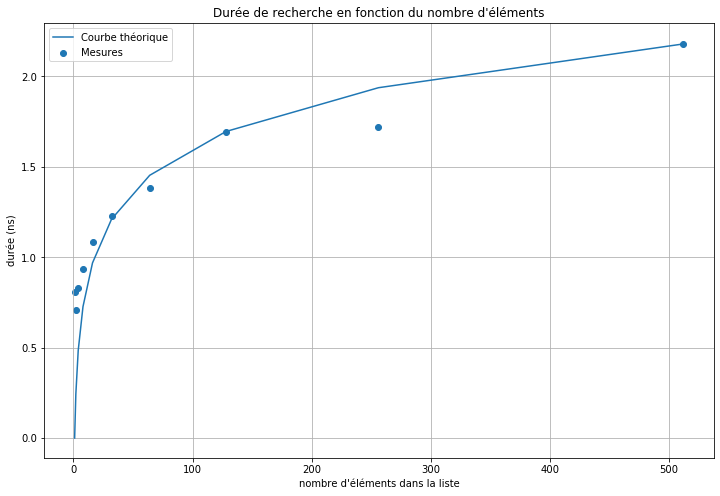

In [198]:
import matplotlib.pyplot as plt
from time import process_time
from prettytable import PrettyTable
from math import log2

def mesure(n):
    """
    Retourne le temps moyen (en ms) pour effectuer la recherche du dernier élément dans une liste triée de n éléments
    """
    liste = create_mots(n, l=5)
    somme = 0
    nombre_essais = 10
    for i in range(nombre_essais):
        start = process_time()
        search_value_dicho(liste[-1], liste)
        end = process_time()
        somme += end-start
    return 1000000*somme/nombre_essais # on effectue la moyenne des temps en nanoseconde

results = []
for i in range(0, 10):
    nombre = 2**i # on passe en puissance de 2
    t = mesure(nombre)
    results.append((nombre, t))

    
plt.figure(figsize=(12, 8))
plt.xlabel("nombre d'éléments dans la liste")
plt.ylabel("durée (ns)")
x = [r[0] for r in results]
y = [r[1] for r in results]
plt.scatter(x, y, label='Mesures')
# détermination des valeurs théoriques en se basant sur la dernière mesure
max_log2 = log2(x[-1])
max_releve = y[-1]
y1 = [max_releve*log2(r[0])/max_log2 for r in results]
plt.plot(x, y1, label='Courbe théorique')

plt.legend()
plt.title("Durée de recherche en fonction du nombre d'éléments")
plt.grid(True)
plt.show()


### Conclusion

Nous avons vu que la recherche dichotomique d'un élément dans une liste triée est très efficace.

Ce type d'algorithme qu'on appelle **'diviser pour régner'** peut être utilisé dans d'autres contextes comme

- le tri d'un tableau ( [tri fusion](https://fr.wikipedia.org/wiki/Tri_fusion) et [tri rapide](https://fr.wikipedia.org/wiki/Tri_rapide) )
- La multiplication de grands nombres ([Algorithme de Karatsuba](https://fr.wikipedia.org/wiki/Algorithme_de_Karatsuba))
- Rechercher les [deux points les plus rapprochés](https://fr.wikipedia.org/wiki/Recherche_des_deux_points_les_plus_rapproch%C3%A9s)
- ...

### Autres ressources

- [Vidéo de l'école Saint Exupéry de Nantes](https://www.youtube.com/watch?v=JdwWMnU04pQ)




https://www.youtube.com/watch?v=JdwWMnU04pQ

[Retour au sommaire](../index.ipynb)